In [1]:
import matplotlib.pyplot as plt
import re
from sklearn.metrics import silhouette_score
from nltk.cluster import KMeansClusterer
import nltk
from sklearn.cluster import KMeans

import pandas as pd
import gensim
import numpy as np
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import random 

data = pd.read_json("preprocessingDoneRight.json")
data

,favorite_count,in_reply_to_user_id_str,is_retweet,retweet_count,text,month,year,hour,week_year,date,modded_text,modded1,noTags_punct,modded1_stemmed
0,202,NaN,False,253,Be sure to tune in and watch Donald Trump on L...,5,2009,18,19,2009-05-04,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night david ...,be sure to tune in and watch donald trump on l...,sure tune watch donald trump late night...
1,3,NaN,False,2,Donald Trump will be appearing on The View tom...,5,2009,1,19,2009-05-05,donald trump will be appearing on the view tom...,donald trump appearing view tomorrow morning d...,donald trump will be appearing on the view tom...,donald trump appear view tomorrow morn ...
10,13,NaN,False,5,"""Don’t be afraid of being unique - it's like b...",5,2009,15,20,2009-05-17,"""don’t be afraid of being unique - it's like b...",afraid unique like afraid best self donald j t...,don t be afraid of being unique its like bein...,afraid uniqu like afraid best self dona...
100,3,NaN,False,15,The latest update on Bret Michaels is that he'...,5,2010,16,20,2010-05-20,the latest update on bret michaels is that he'...,latest update bret michaels hes making every e...,the latest update on bret michaels is that hes...,latest updat bret michael he make everi...
1000,11,NaN,False,71,China is driving the price of gold up in order...,1,2012,19,1,2012-01-05,china is driving the price of gold up in order...,china driving price gold order ease pressure i...,china is driving the price of gold up in order...,china drive price gold order eas pressu...
10000,95,NaN,False,42,"""@KevinMartinRI: I'm a big fan of the new @rea...",8,2013,3,31,2013-08-02,"""@kevinmartinri: i'm a big fan of the new @rea...",kevinmartinri im big fan new realdonaldtrump t...,kevinmartinri im a big fan of the new realdona...,kevinmartinri im big fan new realdonaldt...
10001,7,NaN,False,14,"""@bobbassman: @realDonaldTrump @anthonyolgin l...",8,2013,3,31,2013-08-02,"""@bobbassman: @realdonaldtrump @anthonyolgin l...",bobbassman realdonaldtrump like bush killed ki...,bobbassman realdonaldtrump like when bush ki...,bobbassman realdonaldtrump like bush kill...
10002,29,NaN,False,40,"""@robocosby: help me @realDonaldTrump I am dep...",8,2013,3,31,2013-08-02,"""@robocosby: help me @realdonaldtrump i am dep...",robocosby help realdonaldtrump depressed keep ...,robocosby help me realdonaldtrump i am depress...,robocosbi help realdonaldtrump depress ke...
10003,158,NaN,False,219,Isn't it sad the way Putin is toying with Obam...,8,2013,3,31,2013-08-02,isn't it sad the way putin is toying with obam...,isnt sad way putin toying obama regarding snow...,isnt it sad the way putin is toying with obama...,isnt sad way putin toy obama regard sn...
10004,21,NaN,False,24,"""@hattakzots: @realDonaldTrump you're one of t...",8,2013,3,31,2013-08-02,"""@hattakzots: @realdonaldtrump you're one of t...",hattakzots realdonaldtrump youre one voices re...,hattakzots realdonaldtrump youre one of the on...,hattakzot realdonaldtrump your one voic ...


In [2]:
#stemmed_words = pd.Series(' '.join(data['modded1']).split()).value_counts()
#print(len(stemmed_words))
#plt.hist(stemmed_words.values,bins=70,log=True)
#plt.show

In [3]:
#stemmed_words = stemmed_words[stemmed_words > 3]
#stemmed_words = stemmed_words[stemmed_words < 3000]
#plt.hist(stemmed_words.values,bins=70,log=True)
#plt.show

In [4]:
#data['m'] = data['modded1'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words))
#pd.Series(' '.join(data['m']).split()).value_counts()
#sentences = data[data["year"] == 2016]["m"].tolist()


In [3]:
#don't count words
#sentences = data[data["year"] == 2016]["noTags_punct"].tolist()

#pre-campaign
#data1 = data[data["year"] <= 2016]
#data1 = data1[data1["year"] >= 2015]

#post campaign
data1 = data[data["year"] >= 2017]
sentences = data1["noTags_punct"].tolist()
print(len(data1),len(sentences))
data1["year"].unique()
#sentences = data["noTags_punct"].tolist()

6942 6942


array([2017, 2018, 2019])

In [4]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]
tagged_data

[TaggedDocument(words=['to', 'all', 'americans', 'many', 'blessings', 'to', 'you', 'all', 'looking', 'forward', 'to', 'a', 'wonderful', 'prosperous', '2017', 'as', 'we'], tags=[0]),
 TaggedDocument(words=['rt', 'danscavino', 'on', 'behalf', 'of', 'our', 'next', 'potus', 'teamtrump', 'america'], tags=[1]),
 TaggedDocument(words=['rt', 'reince', 'happy', 'new', 'year', 'gods', 'blessings', 'to', 'you', 'all', 'looking', 'forward', 'to', 'incredible', 'things', 'in', '2017', 'realdonaldtrump', 'will', 'make', 'america'], tags=[2]),
 TaggedDocument(words=['rt', 'erictrump', '2016', 'was', 'such', 'an', 'incredible', 'year', 'for', 'our', 'entire', 'family', 'my', 'beautiful', 'wife', 'made', 'it', 'even', 'better'], tags=[3]),
 TaggedDocument(words=['rt', 'donaldjtrumpjr', 'happy', 'new', 'year', 'everyone', 'newyear', 'family', 'vacation'], tags=[4]),
 TaggedDocument(words=['rt', 'ivankatrump', '2016', 'has', 'been', 'one', 'of', 'the', 'most', 'eventful', 'and', 'exciting', 'years', 'of'

In [5]:
len(tagged_data)

6942

In [6]:
#model = Doc2Vec(vector_size=50, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=100, min_count=2, epochs=40)
#model = Doc2Vec(vector_size=200, min_count=2, epochs=40)
model = Doc2Vec(vector_size=500, min_count=4, epochs=100)

model.build_vocab(tagged_data)


In [7]:
%%time 
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)


CPU times: user 2min 3s, sys: 4.59 s, total: 2min 8s
Wall time: 51.5 s


In [8]:
%%time
#sentences = data[data["year"] == 2016]["noTags_punct"].tolist()
#tagged = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[i]) for i, _d in enumerate(sentences)]

X = []
for i in range(0,len(tagged_data)):
    X.append( model.infer_vector(tagged_data[i].words))

CPU times: user 1min 9s, sys: 78.1 ms, total: 1min 9s
Wall time: 1min 9s


In [9]:
%%time
ranks = []
second_ranks = []
for doc_id in range(len(tagged_data)):
    inferred_vector = model.infer_vector(tagged_data[doc_id].words)
    sims = model.docvecs.most_similar([inferred_vector], topn=len(model.docvecs))
    rank = [docid for docid, sim in sims].index(doc_id)
    ranks.append(rank)
    
    second_ranks.append(sims[1])

CPU times: user 41min 31s, sys: 1h 34min 30s, total: 2h 16min 2s
Wall time: 5min 40s


In [10]:
import collections

collections.Counter(ranks)  # Results vary between runs due to random seeding and very small corpus


Counter({0: 6706,
         4: 9,
         1: 108,
         16: 2,
         12: 5,
         8: 6,
         65: 1,
         1184: 1,
         5: 8,
         55: 3,
         2: 16,
         1270: 1,
         44: 1,
         35: 1,
         7: 7,
         3: 14,
         17: 2,
         28: 1,
         31: 1,
         9: 3,
         41: 1,
         15: 4,
         20: 4,
         13: 3,
         18: 1,
         19: 1,
         39: 1,
         57: 2,
         24: 3,
         14: 2,
         1600: 1,
         23: 1,
         104: 1,
         6: 3,
         34: 2,
         47: 1,
         11: 3,
         6551: 1,
         61: 1,
         78: 1,
         10: 2,
         52: 1,
         5525: 1,
         3692: 1,
         2499: 1,
         53: 1,
         30: 1,
         84: 1})

In [11]:
print('Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
print(u'SIMILAR/DISSIMILAR DOCS PER MODEL %s:\n' % model)
for label, index in [('MOST', 0), ('SECOND-MOST', 1), ('MEDIAN', len(sims)//2), ('LEAST', len(sims) - 1)]: 
    print(u'%s %s: «%s»\n' % (label, sims[index], ' '.join(tagged_data[sims[index][0]].words)))


Document (6941): «today it was my great honor to welcome prime minister netanyahu of israel back to the whitehouse where i signed a presidential proclamation recognizing israel s sovereignty over the golan heights read more»

SIMILAR/DISSIMILAR DOCS PER MODEL Doc2Vec(dm/m,d500,n5,w5,mc4,s0.001,t3):

MOST (6941, 0.8743047714233398): «today it was my great honor to welcome prime minister netanyahu of israel back to the whitehouse where i signed a presidential proclamation recognizing israel s sovereignty over the golan heights read more»

SECOND-MOST (3929, 0.5390825271606445): «a great first lady»

MEDIAN (4335, 0.2254672646522522): «pastor praises trump as problack at prison reform event»

LEAST (5355, -0.058022961020469666): «the fake news is doing everything in their power to blame republicans conservatives and me for the division and hatred that has been going on for so long in our country actually it is their fake dishonest reporting which is causing problems far greater than they 

In [12]:
doc_id = random.randint(0, len(tagged_data) - 1)

# Compare and print the second-most-similar document
print('Train Document ({}): «{}»\n'.format(doc_id, ' '.join(tagged_data[doc_id].words)))
sim_id = second_ranks[doc_id]
print('Similar Document {}: «{}»\n'.format(sim_id, ' '.join(tagged_data[sim_id[0]].words)))


Train Document (5608): «people are not being told that the republican party is on track to pick up two seats in the us senate and epic victory 53 to 47 the fake news media only wants to speak of the house where the midterm results were better than other sitting presidents»

Similar Document (5606, 0.8429926633834839): «people are not being told that the republican party is on track to pick up two seats in the us senate and epic victory 53 to 47 the fake news media only wants to speak of the house were the midterm results were better than other sitting presidents»



# hierachical


from sklearn.cluster import AgglomerativeClustering

#average 
#2 0.20235462
#3 0.17323813
#4 0.15857914
#5 0.15378755
#6 0.078243
#7 0.051599164
#8 0.036651324
#9 0.028211854


for c in range(2,10):
    clustering = AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=c)
    clustering.fit(X)
    labels = clustering.labels_
    d = silhouette_score(X, labels,metric='cosine')
    print(c,d)

clustering = AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=6)
clustering.fit(X)
assigned_clusters = clustering.labels_
d = silhouette_score(X, assigned_clusters,metric='cosine')

print(d)
NUM_CLUSTERS = 5

# kmeans

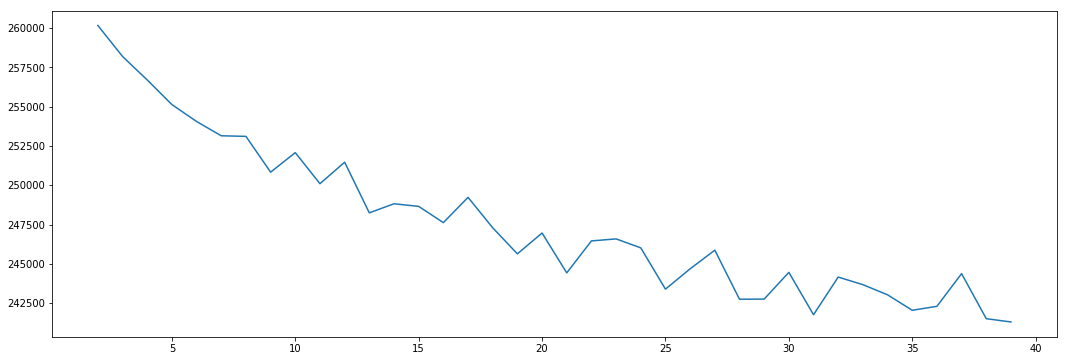

CPU times: user 22min 12s, sys: 20min 51s, total: 43min 4s
Wall time: 7min 43s


In [13]:
%%time

#solo per aveere un'idea di quanti cluster
sse_list = list()
max_k = 40
plt.figure(figsize=(18,6))
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)
plt.show()

In [14]:
%%time
#stemmed counted
#0.112 8 cluster 
#0.12 8 cluster con lunghezza vettore 100
#0.135 8 cluster con lunghezza vettore 200
#0.133 8 cluster con lunghezza vettore 300

#not stemmed counted
#0.135 8 cluster con lunghezza 100
#0.149 8 cluster con lunghezza 200
#0.148 8 cluster con lunghezza 300

#all words not stemmed, no stopwords
#0.114 6 cluster 100
#0.136 8 cluster 100
#0.122 8 cluster 200
#0.144 8 cluster 300


#5 cluster not stemmed, 300, full sembra faccia cluster nicely, 0.14 e passa 
#4 " ", 0.142

#doc2vec trained on whole dataset, lower silhouettes, words?
#4 0.66
#6 0.64

#4 0.79 500/min 4

#30 cluster su 2015/2016 silhouette 0.02 e passa
#10   0.028/0.28 non ho visto 
#15 0.027
#8 0.026
#5 0.026


NUM_CLUSTERS = 7
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=40)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print (assigned_clusters)
d = silhouette_score(X, assigned_clusters,metric='cosine')
print(d)

0.011230745
CPU times: user 26min 33s, sys: 2.02 s, total: 26min 35s
Wall time: 26min 31s


In [15]:
datak = data1
datak["labels"] = assigned_clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
clusters_wordCount = []
for cluster in range(0,NUM_CLUSTERS):
    c = datak[datak["labels"] == cluster]
    print(len(c))
   # words = pd.Series(' '.join(c['m']).split()).value_counts()
    words = pd.Series(' '.join(c['modded1']).split()).value_counts()
    m = words.mean()
    words = words[words > m]
    clusters_wordCount.append(words)
    print("Cluster " + str(cluster) + " dimension " + str(len(c)))

524
Cluster 0 dimension 524
1211
Cluster 1 dimension 1211
557
Cluster 2 dimension 557
2099
Cluster 3 dimension 2099
824
Cluster 4 dimension 824
1001
Cluster 5 dimension 1001
726
Cluster 6 dimension 726


In [17]:
for c in range(0,NUM_CLUSTERS):
    print("cluster ", c , clusters_wordCount[c][0:10])

cluster  0 us           463
trade        144
china        117
great         75
country       66
big           64
president     62
many          61
mexico        59
people        56
dtype: int64
cluster  1 rt           465
trump        279
president    212
american     133
america      122
news          92
today         90
new           78
people        69
fake          68
dtype: int64
cluster  2 great          217
crime           69
president       67
endorsement     62
people          62
trump           59
governor        55
total           53
job             52
state           51
dtype: int64
cluster  3 great              706
thank              314
rt                 306
today              211
realdonaldtrump    178
america            153
president          137
big                136
vote               134
people             123
dtype: int64
cluster  4 great      221
people     107
country     85
big         85
many        77
border      67
much        64
wall        54
tax         5

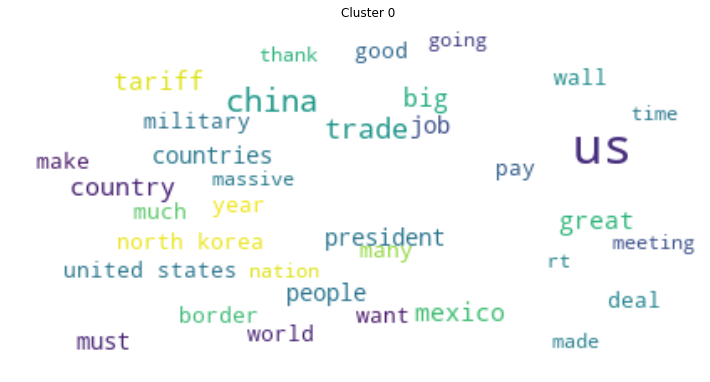

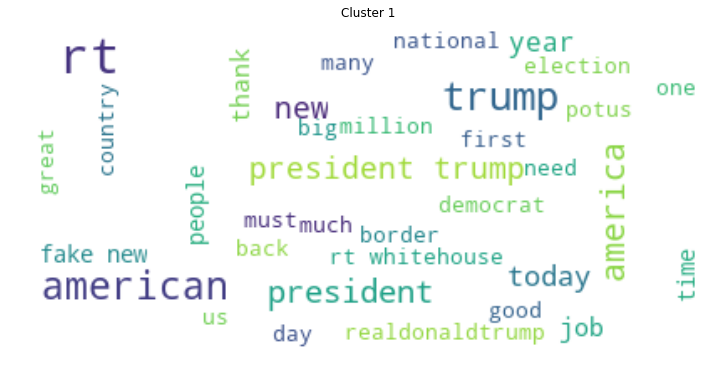

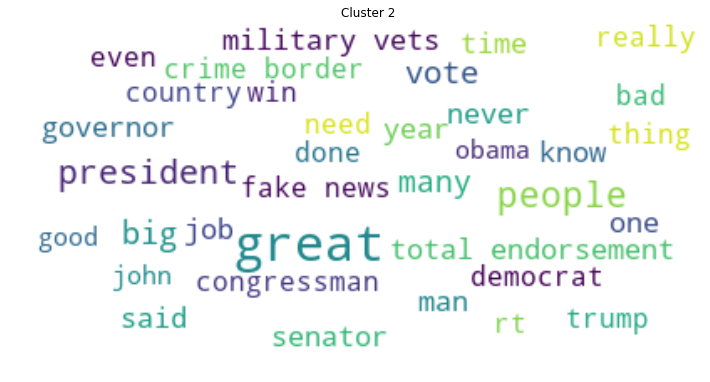

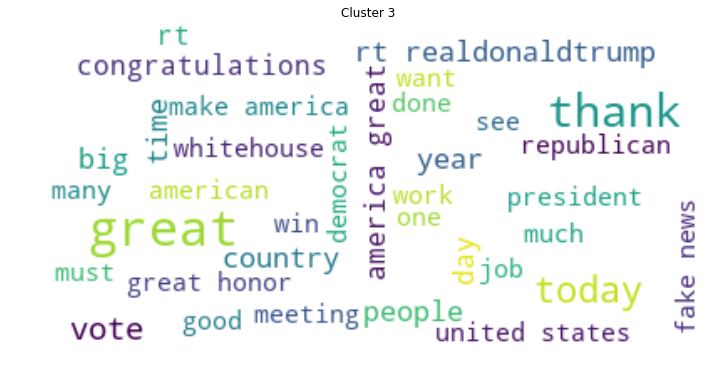

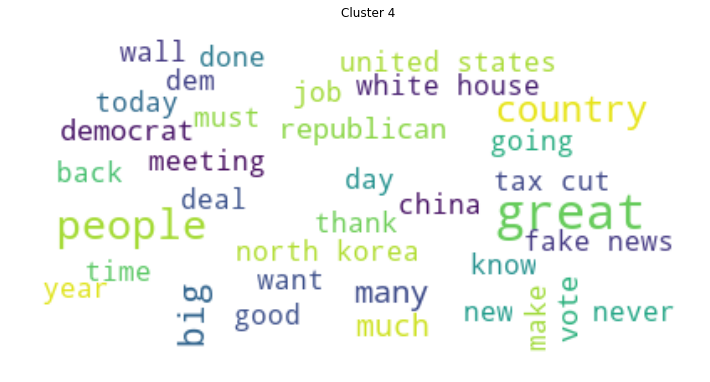

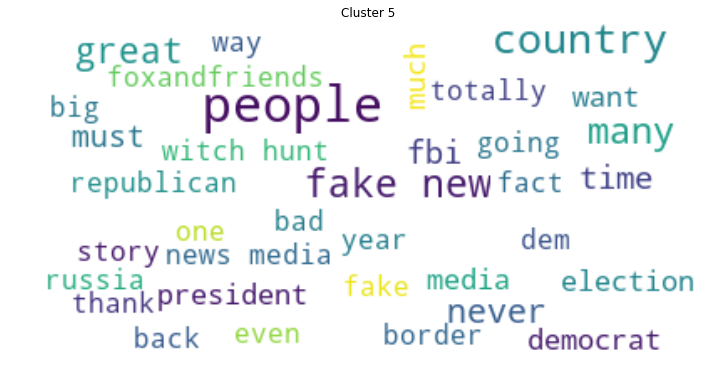

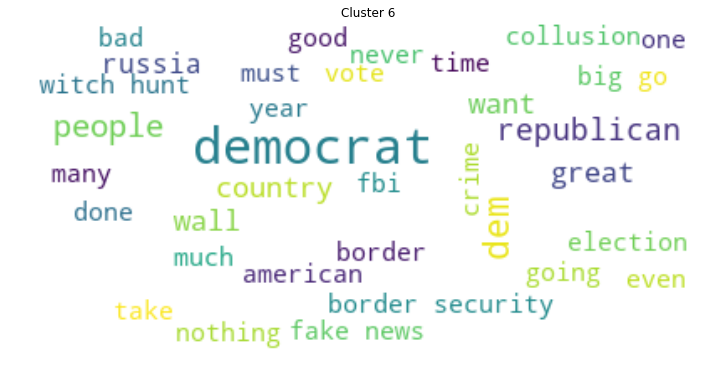

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

for c in range(0,NUM_CLUSTERS):
    temp = datak[datak["labels"] == c] 
    print
    text = temp["modded1"]
    text = text.str.cat(sep=' ')

    wordcloud = WordCloud(max_font_size=30, max_words=35, background_color="white").generate(text)
    plt.figure(figsize=(12,10))    
    plt.title("Cluster " + str(c))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


In [20]:
#trova un modo di clusterizzare le cose assieme ai dati / sentiment analysis

In [19]:
datak.to_json("7postElection.json")